In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pickle

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

import neurolib.dashboard.data as data
from neurolib.models.aln import ALNModel
import neurolib.dashboard.layout as layout
import neurolib.dashboard.functions as functions


# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

not here


In [2]:
readpath = os.getcwd().split(os.sep + 'data_2')[0]

with open(readpath + os.sep + 'bi.pickle','rb') as file:
    load_array= pickle.load(file)
ext_exc = load_array[0]
ext_inh = load_array[1]

cmap = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors()
exc_red = cmap(3)
inh_blue=cmap(0)
green = cmap(2)

aln = ALNModel()
data.set_parameters(aln)
state_vars = aln.state_vars

facecolor_ = '#EAEAEA'
facecolor_ = 'white'

folder = str(os.getcwd().split('data_2')[1])[1:]
print(folder)

2_e


In [3]:
ind0 = 20
dur = 500.

data.set_parameters(aln)

aln.params.ext_exc_current = ext_exc[ind0] * 5.
aln.params.ext_inh_current = ext_inh[ind0] * 5.
        
maxI = 3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_1 = aln.getZeroTarget()
target_1[:,0,:] = aln.rates_exc[0,-1] 
target_1[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)
        
maxI = -3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_3 = aln.getZeroTarget()
target_3[:,0,:] = aln.rates_exc[0,-1] 
target_3[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)

aln.params.ext_exc_current = ext_exc[50] * 5.
aln.params.ext_inh_current = ext_inh[50] * 5.
        
maxI = 3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_1b = aln.getZeroTarget()
target_1b[:,0,:] = aln.rates_exc[0,-1] 
target_1b[:,1,:] = aln.rates_inh[0,-1]

aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = -maxI)
aln.run(control=control0)
        
maxI = -3.          
aln.params.duration = 3000.
control0 = aln.getZeroControl()
control0 = functions.step_control(aln, maxI_ = maxI)
aln.run(control=control0)

aln.params.duration = dur
target_3b = aln.getZeroTarget()
target_3b[:,0,:] = aln.rates_exc[0,-1] 
target_3b[:,1,:] = aln.rates_inh[0,-1]

In [4]:
def readcase(readpath, i):

    with open(readpath,'rb') as f:
        load_array = pickle.load(f)

    bestControl_ = load_array[0][i]
    bestState_ = load_array[1][i]
    cost_ = load_array[2][i]
    costnode_ = load_array[3][i]
    weights_ = load_array[4][i]
        
    return bestControl_, bestState_, costnode_, weights_

In [5]:
savepath = os.path.join(os.getcwd().split('neurolib')[0], 'writing' + os.sep + 'paper1' + os.sep 
                        + 'Frontiers' + os.sep + 'images')
savepath = '.'
cols = [r'down $\rightarrow$ up, $L^1$, point a', r'down $\rightarrow$ up, $L^1$, point b',
        r'down $\rightarrow$ up, $L^2$, point a', r'down $\rightarrow$ up, $L^2$, point b',
        r'up $\rightarrow$ down, $L^1$, point a', r'up $\rightarrow$ down, $L^1$, point b',
        r'up $\rightarrow$ down, $L^2$, point a', r'up $\rightarrow$ down, $L^2$, point b'
       ] 

In [6]:
def plot_control_current(model, control_array, state_array, weight_array,
                         target_, title, costnode_array, y_lim, y_ticks, x_ticks,
                         path_=savepath, filename_=''):
    
    dt = model.params.dt
    control_factor = model.params.C/1000.
    output_vars = model.output_vars
    
    n_subfigs = len(control_array)
    columns = len(control_array[0])
    rows = 2
    
    fig = plt.figure(figsize=(columns*5, n_subfigs*5), constrained_layout=True)
    subfigs = fig.subfigures(n_subfigs, 1)
    
    linewidth_ = 3    
    fontsize_ = 18
    
    #fig.text(0., 1., 'A', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    #fig.text(0., 0.75, 'B', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    #fig.text(0., 0.5, 'C', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    #fig.text(0., 0.25, 'D', horizontalalignment='left', verticalalignment='top', fontsize=fontsize_, weight='bold')
    
    props = dict(boxstyle='round', facecolor='grey', alpha=0.2)

    for i in range(n_subfigs):
            
        ax = subfigs[i].subplots(rows, columns)
        
        ##################### go through all controls in control array 
        
        for j in range(columns):
                        
            control_ = control_array[i][j]
            state_ = state_array[i][j]
            costnode_ = costnode_array[i][j]
            dur = (control_.shape[2] - 201.) * dt
            T = control_.shape[2] - 200
            weight = weight_array[i][j]
            
            time_ = np.arange(0., round(dur + dt, 1), dt)
            
            if 'Wmax' in filename_:
                ax[0,j].set_title('$T = ${:.1f}'.format(dur) + ' ms, ' + r'$W_2 = ${:.2f}'.format(weight),
                                       fontsize=fontsize_)
            else:
                ax[0,j].set_title('$T = ${:.1f}'.format(dur) + ' ms',
                                       fontsize=fontsize_)
            
            ax[0,j].plot(time_, target_[0,0,:T], '--', linewidth = 3, color=exc_red)
            ax[0,j].plot(time_, target_[0,1,:T], '--', linewidth = 3, color=inh_blue)
            
            ax[0,j].plot(time_, state_[0,0,100:-100], linewidth=linewidth_, color=exc_red)
            ax[0,j].plot(time_, state_[0,1,100:-100], linewidth=linewidth_, color=inh_blue)                     
            ax[1,j].plot(time_, control_[0,0,100:-100] * control_factor, linewidth=linewidth_, color=exc_red)
            ax[1,j].plot(time_, control_[0,1,100:-100] * control_factor, linewidth=linewidth_, color=inh_blue)                
                
            ax[0,j].axvspan( dur - 20., dur+1., facecolor='grey', alpha=0.2, zorder=-1, hatch='///', edgecolor = 'grey')

            ax[0,j].set_xticks([])
            ax[0,j].get_xaxis().set_visible(False)
            ax[1,j].set_xlabel('t [ms]', fontsize=fontsize_) 
            ax[0,j].set_yticks(np.arange(0., 105., 25.))
            if j != 0:
                ax[0,j].set_yticks([])
            ax[0,j].set_ylim([-5., 120.])
            
            ax[1,j].set_yticks(y_ticks[i][j])
            ax[1,j].set_ylim(y_lim[i][j])
            ax[1,j].set_xticks(x_ticks[i][j])
            
            
            if np.abs(costnode_[2][0][0]) < 1e-12:
                costnode_[2][0][0] = 0.
            if np.abs(costnode_[2][0][1]) < 1e-12:
                costnode_[2][0][1] = 0.
            
            textstr = str( r'$F_P = $' + '{:#.4g}'.format(costnode_[0][0][0])
                        + '\n' + r'$F_{1,E} =$' + '{:#.4g}'.format(costnode_[2][0][0]) 
                        + '\n' + r'$F_{1,I} =$' + '{:#.4g}'.format(costnode_[2][0][1])
                         )
            
            #ax[0,j].text(0.05, 0.9, textstr, transform=ax[0,j].transAxes, fontsize=fontsize_,
            #verticalalignment='top', horizontalalignment='left', bbox=props)

            for l in range(rows):
                ax[l,j].tick_params(axis='x', labelsize=fontsize_)
                ax[l,j].tick_params(axis='y', labelsize=fontsize_)
                ax[l,j].set_xlim([0., dur])
                ax[l,j].grid(False)

            ax[0,0].set_ylabel('Rates [Hz]', fontsize=fontsize_)      
            ax[1,0].set_ylabel('Control [nA]', fontsize=fontsize_)  

    fig.suptitle(title, fontsize=fontsize_, y=1.03)
        
    plt.savefig(os.path.join(path_, filename_), bbox_inches='tight', facecolor=fig.get_facecolor(),
                edgecolor='none', dpi=300)
    plt.savefig( filename_, bbox_inches='tight', facecolor=fig.get_facecolor(),
                edgecolor='none', dpi=300)

In [7]:
i = 20

In [8]:
readpath = str(folder + '.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,0)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)
        if type(weights_[j]) == type(None):
            weights_[j] = [1., 0., 1.]

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3810
3820
3830
3840
3850
3860
3870
3880
3890
3900
3910
3920
3930
3940
3950
3960
3970
3980
3990
4000
4010
4020
4030
4040
4050
4060
4070
4080
4090
4100
4110
4120
4130
4140
4150
4160
4170
4180
4190
4200
4210
4220
4230
4240
4250
4260
4270
4280
4290
4300
4310
4320
4330
4340
4350
4360
4370
4380
4390
4400
4410
4420
4430
4440
4450
4460
4470
4480
4490
4500
4510
4520
4530
4540
4550
4560
4570
4580
4590
4600
4610
4620
4630
4640
4650
4660
4670
4680
4690
4700
4710
4720
4730
4740
4750
4760
4770
4780
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800


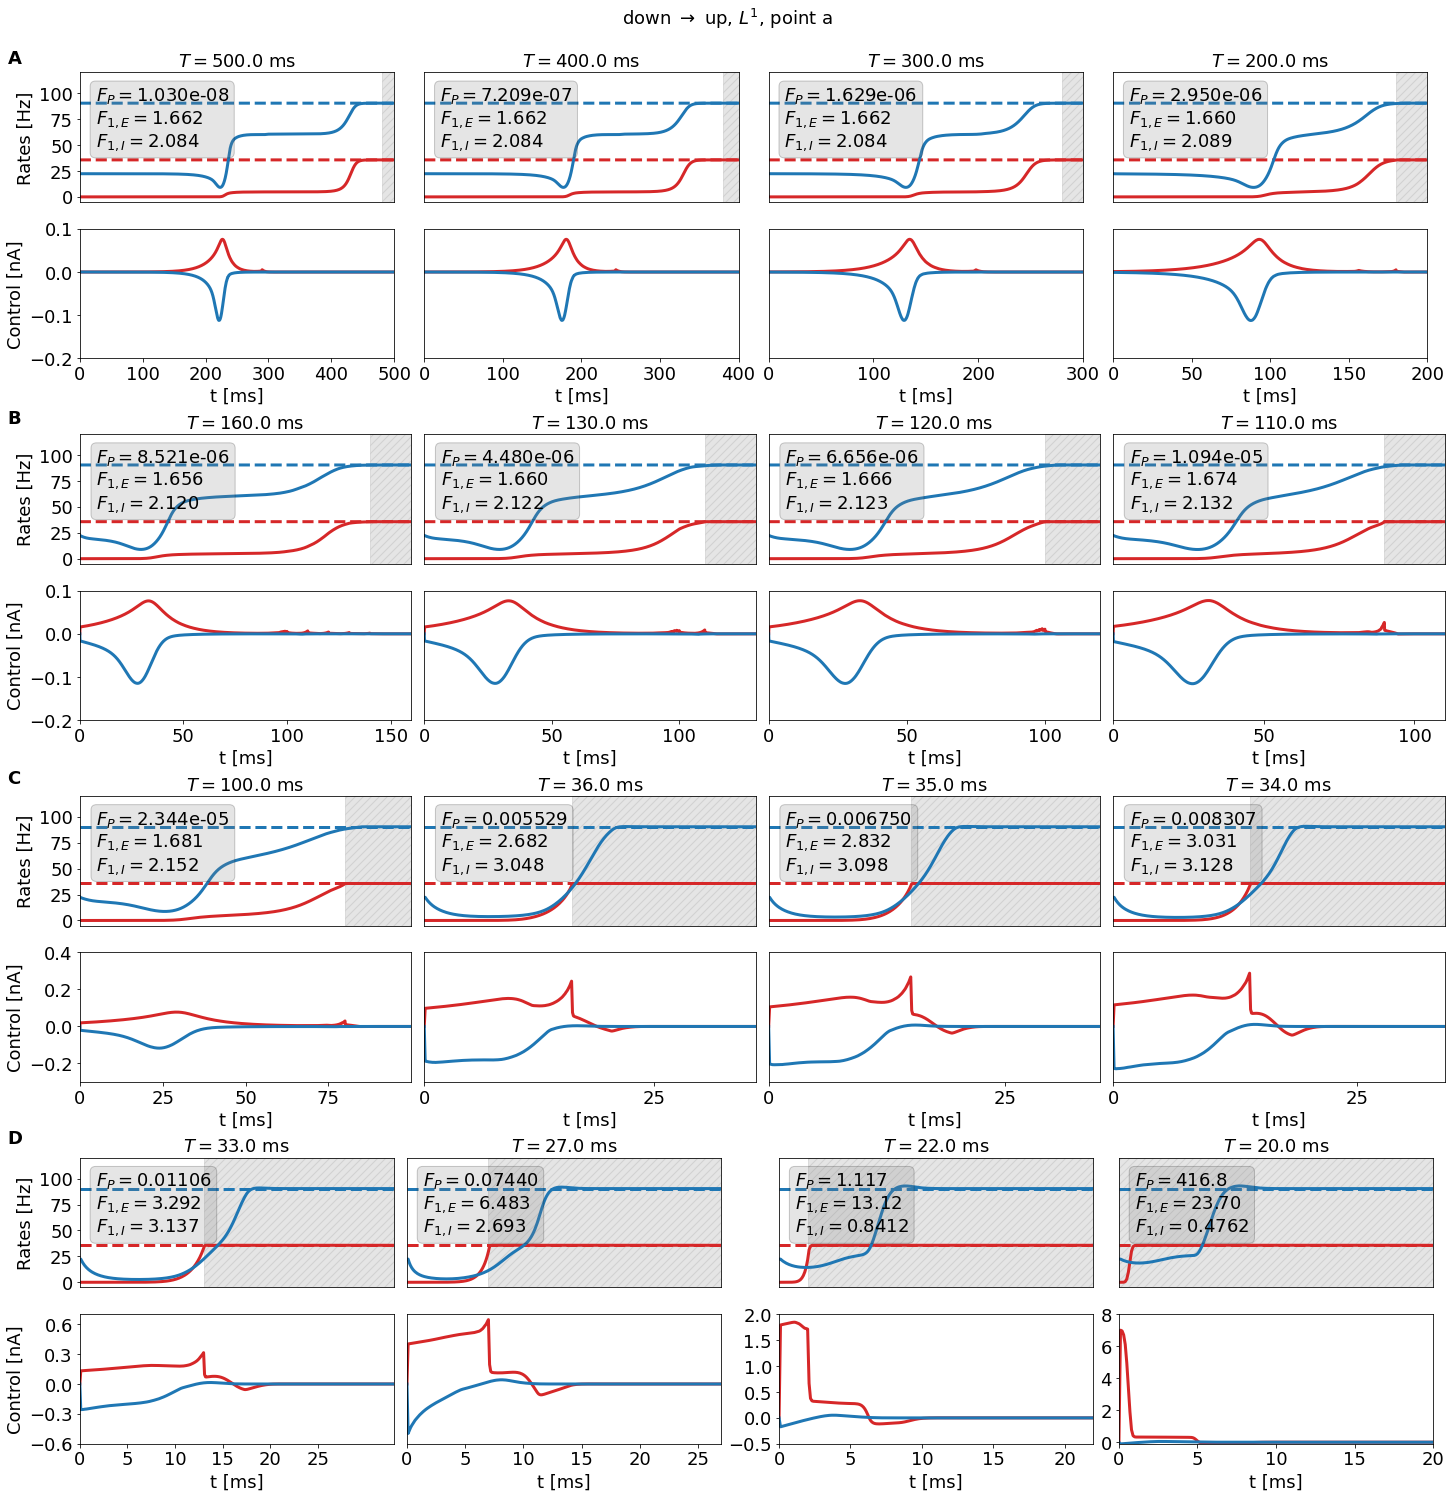

In [9]:
index_ = [ [0, 1000, 2000, 3000], 
          [3400, 3700, 3800, 3900],
          [4000, 4640, 4650, 4660],
          [4670, 4730, 4780, 4800] ]

y_lim = [ [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.3, 0.4], [-0.3, 0.4], [-0.3, 0.4], [-0.3, 0.4] ],
          [[-.6, 0.7], [-.6, 0.7], [-.5, 2.], [-.1, 8.] ]
        ]
y_ticks = [ [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.2, 0., 0.2, 0.4], [], [], [] ],
            [ np.arange(-0.6,0.7,0.3), [], np.arange(-0.5,2.5,0.5), np.arange(0.,9.,2.)],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][1], weights_[index_[0][1]][1], weights_[index_[0][2]][1],
                 weights_[index_[0][3]][1] ],
                [weights_[index_[1][0]][1], weights_[index_[1][1]][1], weights_[index_[1][2]][1],
                 weights_[index_[1][3]][1] ],
                [weights_[index_[2][0]][1], weights_[index_[2][1]][1], weights_[index_[2][2]][1],
                 weights_[index_[2][3]][1] ],
                [weights_[index_[3][0]][1], weights_[index_[3][1]][1], weights_[index_[3][2]][1],
                 weights_[index_[3][3]][1] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '.jpg')
plt.show()

In [25]:
readpath = str(folder + '_Wmax.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,0)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3809
3810
3819
3820
3829
3830
3839
3840
3849
3850
3859
3860
3869
3870
3879
3880
3889
3890
3899
3900
3909
3910
3919
3920
3929
3930
3939
3940
3949
3950
3959
3960
3969
3970
3979
3980
3989
3990
3999
4000
4009
4010
4019
4020
4029
4030
4039
4040
4049
4050
4059
4060
4069
4070
4079
4080
4089
4090
4099
4100
4109
4110
4119
4120
4129
4130
4139
4140
4149
4150
4159
4160
4169
4170
4179
4180
4189
4190
4199
4200
4209
4210
4219
4220
4229
4230
4239
4240
4249
4250
4259
4260
4269
4270
4279
4280
4289
4290
4299
4300
4309
4310
4319
4320
4329
4330
4339
4340
4349
4350
4359
4360
4369
4370
4379
4380
4389
4390
4399
4400
4409
4410
4419
4420
4429
4430
4439
4440
4449
4450
4459
4460
4469
4470
4479
4480
4489
4490
4499
4500
4509
4510
4519
4520
4529
4530
4539
4540
4549
4550
4559
4560
4569
4570
4579
4580
4589
4590
4599
4600
4609
4610
4619
46

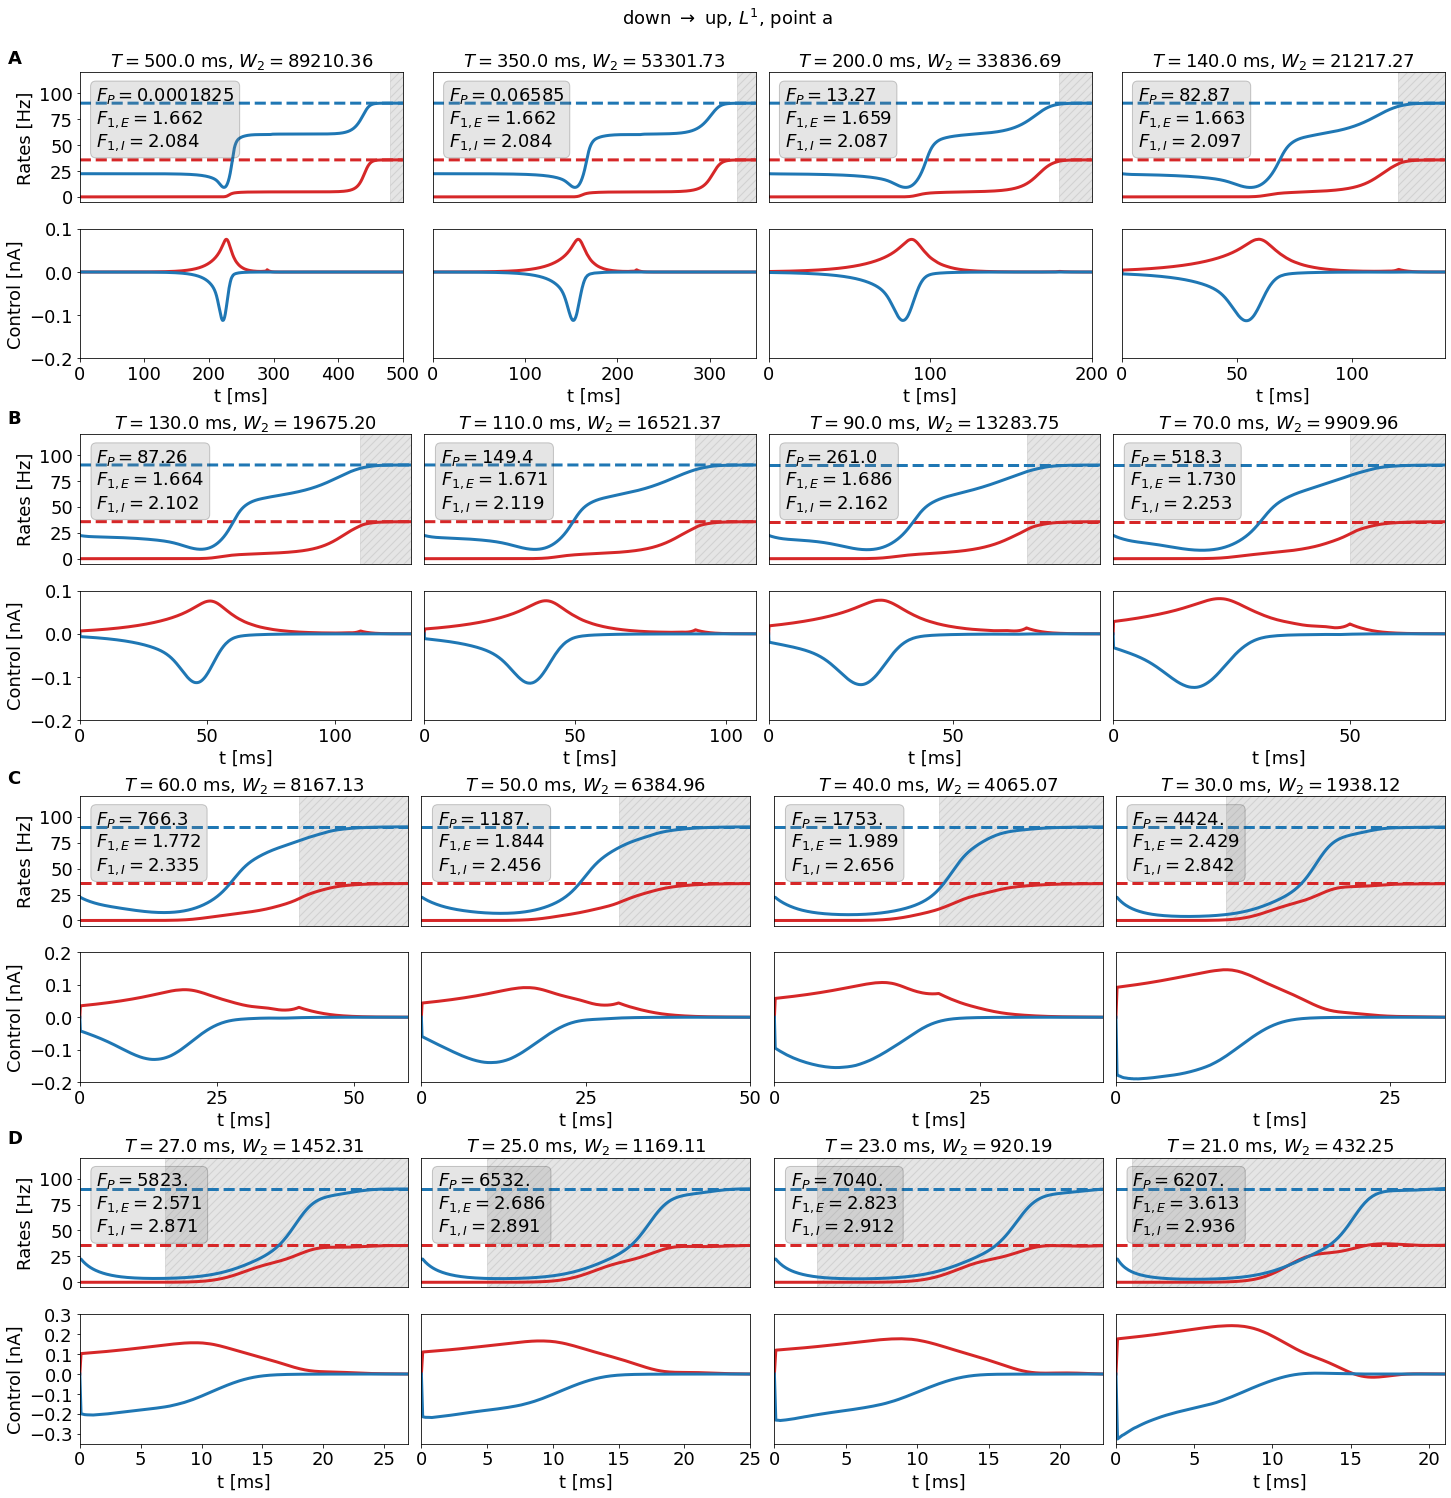

In [26]:
index_ = [ [0, 1500, 3000, 3600], 
          [3700, 3900, 4100, 4300],
          [4400, 4500, 4600, 4700],
          [4730, 4750, 4770, 4790] ]

y_lim = [ [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1], [-0.2, 0.1] ],
          [[-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2] ],
          [[-0.35, 0.3], [-0.35, 0.3], [-0.35, 0.3], [-0.35, 0.3] ]
        ]
y_ticks = [ [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.2, -0.1, 0., 0.1], [], [], [] ],
            [[-0.2, -0.1, 0., 0.1, 0.2], [], [], [] ],
            [np.arange(-0.3,0.4,0.1), [], [], [] ],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][1], weights_[index_[0][1]][1], weights_[index_[0][2]][1],
                 weights_[index_[0][3]][1] ],
                [weights_[index_[1][0]][1], weights_[index_[1][1]][1], weights_[index_[1][2]][1],
                 weights_[index_[1][3]][1] ],
                [weights_[index_[2][0]][1], weights_[index_[2][1]][1], weights_[index_[2][2]][1],
                 weights_[index_[2][3]][1] ],
                [weights_[index_[3][0]][1], weights_[index_[3][1]][1], weights_[index_[3][2]][1],
                 weights_[index_[3][3]][1] ]
                ]

plot_control_current(aln, cntrl_array, state_array, weight_array, target_1, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '_Wmax.jpg')
plt.show()

In [27]:
i = 50

In [13]:
readpath = str(folder + '.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,1)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2899
2900
2999
3000
3099
3100
3199
3200
3299
3300
3399
3400
3499
3500
3599
3600
3699
3700
3799
3800
3809
3810
3819
3820
3829
3830
3839
3840
3849
3850
3859
3860
3869
3870
3879
3880
3889
3890
3899
3900
3909
3910
3919
3920
3929
3930
3939
3940
3949
3950
3959
3960
3969
3970
3979
3980
3989
3990
3999
4000
4009
4010
4019
4020
4029
4030
4039
4040
4049
4050
4059
4060
4069
4070
4079
4080
4089
4090
4099
4100
4109
4110
4119
4120
4129
4130
4139
4140
4149
4150
4159
4160
4169
4170
4179
4180
4189
4190
4199
4200
4209
4210
4219
4220
4229
4230
4239
4240
4249
4250
4259
4260
4269
4270
4279
4280
4289
4290
4299
4300
4309
4310
4319
4320
4329
4330
4339
4340
4349
4350
4359
4360
4369
4370
4379
4380
4389
4390
4399
4400
4409
4410
4419
4420
4429
4430
4439
4440
4449
4450
4459
4460
4469
4470
4479
4480
4489
4490
4499
4500
4509
4510
4519
4520
4529
4530
4539
4540
4549
4550
4559
4560
4569
45

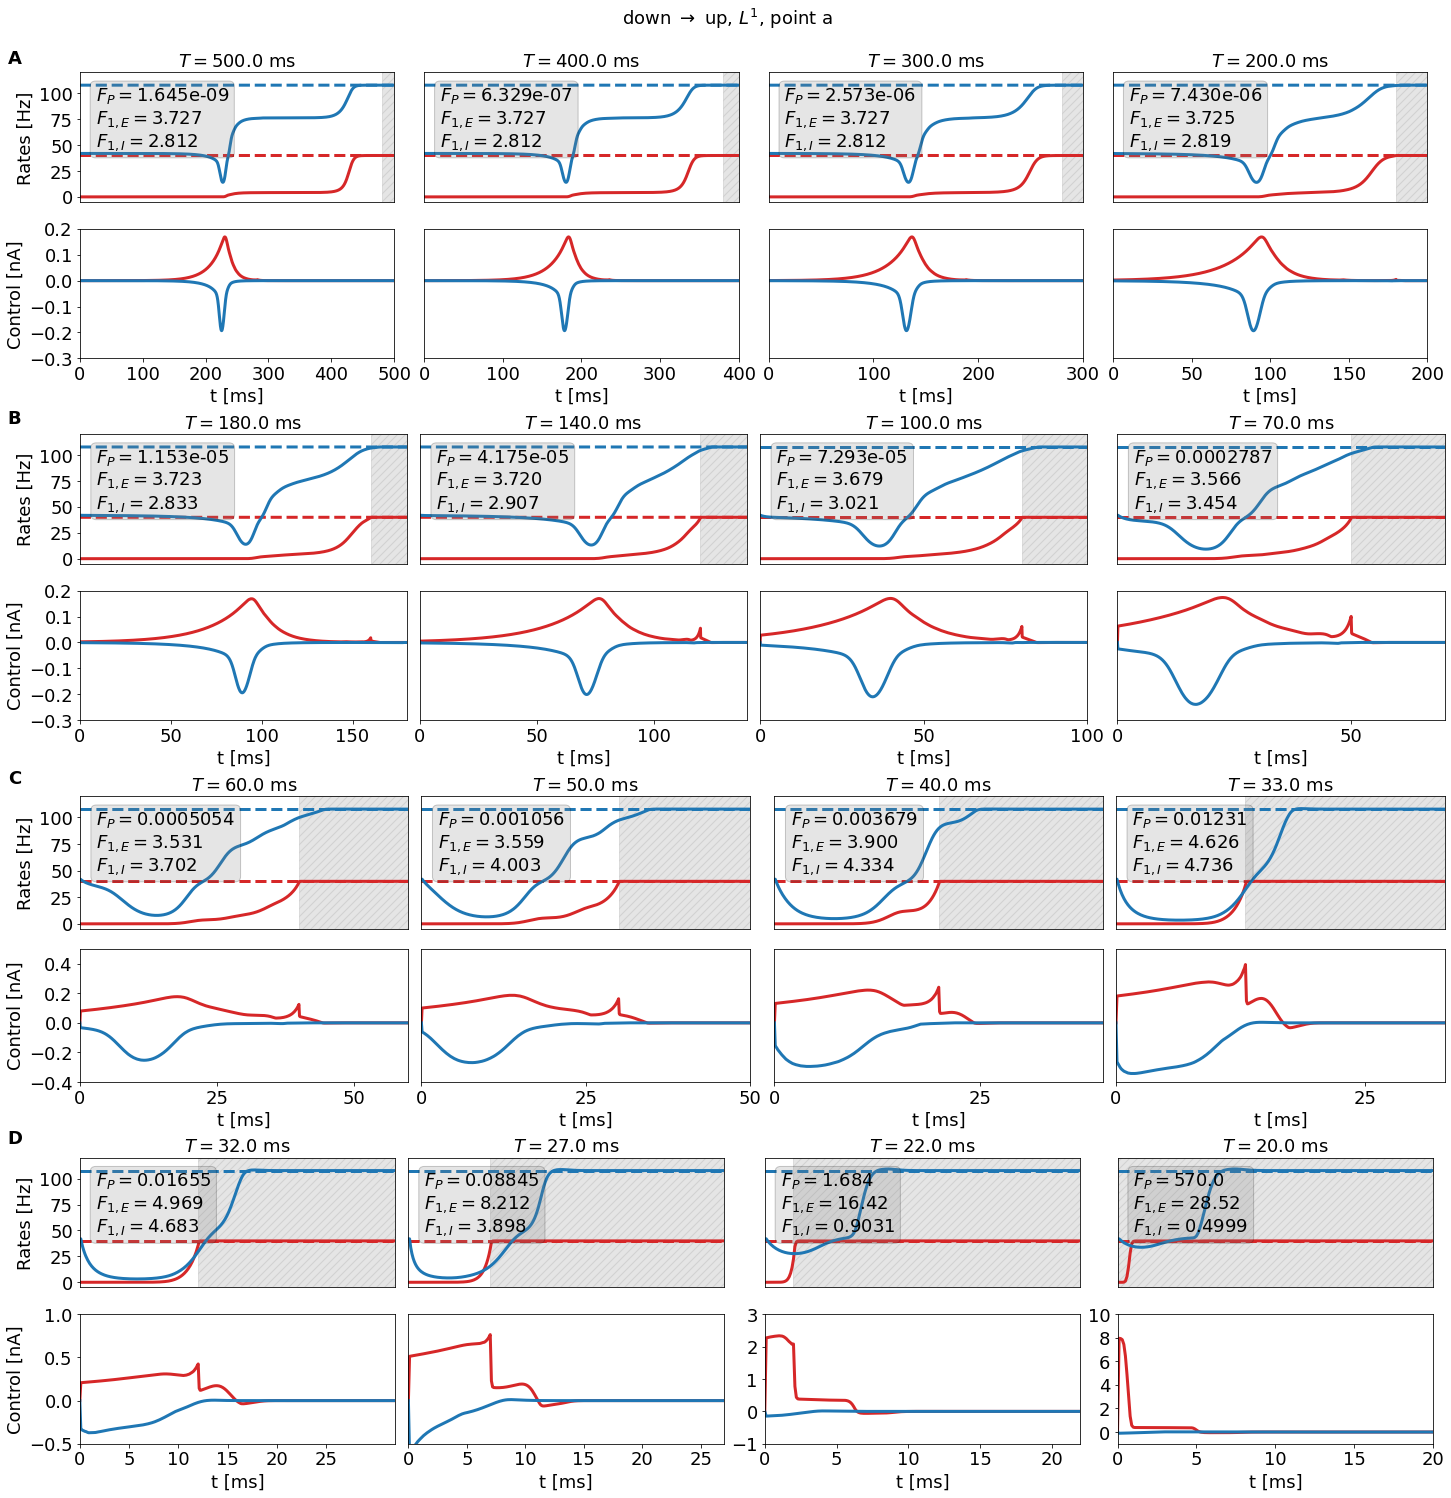

In [14]:
index_ = [ [0, 1000, 2000, 3000], 
          [3200, 3600, 4000, 4300],
          [4400, 4500, 4600, 4670],
          [4680, 4730, 4780, 4800] ]

y_lim = [ [[-0.3, 0.2], [-0.3, 0.2], [-0.3, 0.2], [-0.3, 0.2] ],
          [[-0.3, 0.2], [-0.3, 0.2], [-0.3, 0.2], [-0.3, 0.2] ],
          [[-0.4, 0.5], [-0.4, 0.5], [-0.4, 0.5], [-0.4, 0.5] ],
          [[-0.5, 1.], [-0.5, 1.], [-1., 3.], [-1., 10.] ]
        ]
y_ticks = [ [np.arange(-0.3, 0.3, 0.1), [], [], [] ],
            [np.arange(-0.3, 0.3, 0.1), [], [], [] ],
            [np.arange(-0.4, 0.5, 0.2), [], [], [] ],
            [np.arange(-0.5, 1.5, 0.5), [], np.arange(-1, 4, 1), np.arange(0, 11, 2)],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][1], weights_[index_[0][1]][1], weights_[index_[0][2]][1],
                 weights_[index_[0][3]][1] ],
                [weights_[index_[1][0]][1], weights_[index_[1][1]][1], weights_[index_[1][2]][1],
                 weights_[index_[1][3]][1] ],
                [weights_[index_[2][0]][1], weights_[index_[2][1]][1], weights_[index_[2][2]][1],
                 weights_[index_[2][3]][1] ],
                [weights_[index_[3][0]][1], weights_[index_[3][1]][1], weights_[index_[3][2]][1],
                 weights_[index_[3][3]][1] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1b, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '.jpg')
plt.show()

In [28]:
readpath = str(folder + '_Wmax.pickle')
opt_control, opt_state, costnode_, weights_ = readcase(readpath,1)
for j in range(len(opt_control)):
    if type(opt_control[j]) != type(None):
        print(j)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3809
3810
3819
3820
3829
3830
3839
3840
3849
3850
3859
3860
3869
3870
3879
3880
3889
3890
3899
3900
3909
3910
3919
3920
3929
3930
3939
3940
3949
3950
3959
3960
3969
3970
3979
3980
3989
3990
3999
4000
4009
4010
4019
4020
4029
4030
4039
4040
4049
4050
4059
4060
4069
4070
4079
4080
4089
4090
4099
4100
4109
4110
4119
4120
4129
4130
4139
4140
4149
4150
4159
4160
4169
4170
4179
4180
4189
4190
4199
4200
4209
4210
4219
4220
4229
4230
4239
4240
4249
4250
4259
4260
4269
4270
4279
4280
4289
4290
4299
4300
4309
4310
4319
4320
4329
4330
4339
4340
4349
4350
4359
4360
4369
4370
4379
4380
4389
4390
4399
4400
4409
4410
4419
4420
4429
4430
4439
4440
4449
4450
4459
4460
4469
4470
4479
4480
4489
4490
4499
4500
4509
4510
4519
4520
4529
4530
4539
4540
4549
4550
4559
4560
4569
4570
4579
4580
4589
4590
4599
4600
4609
4610
4619
46

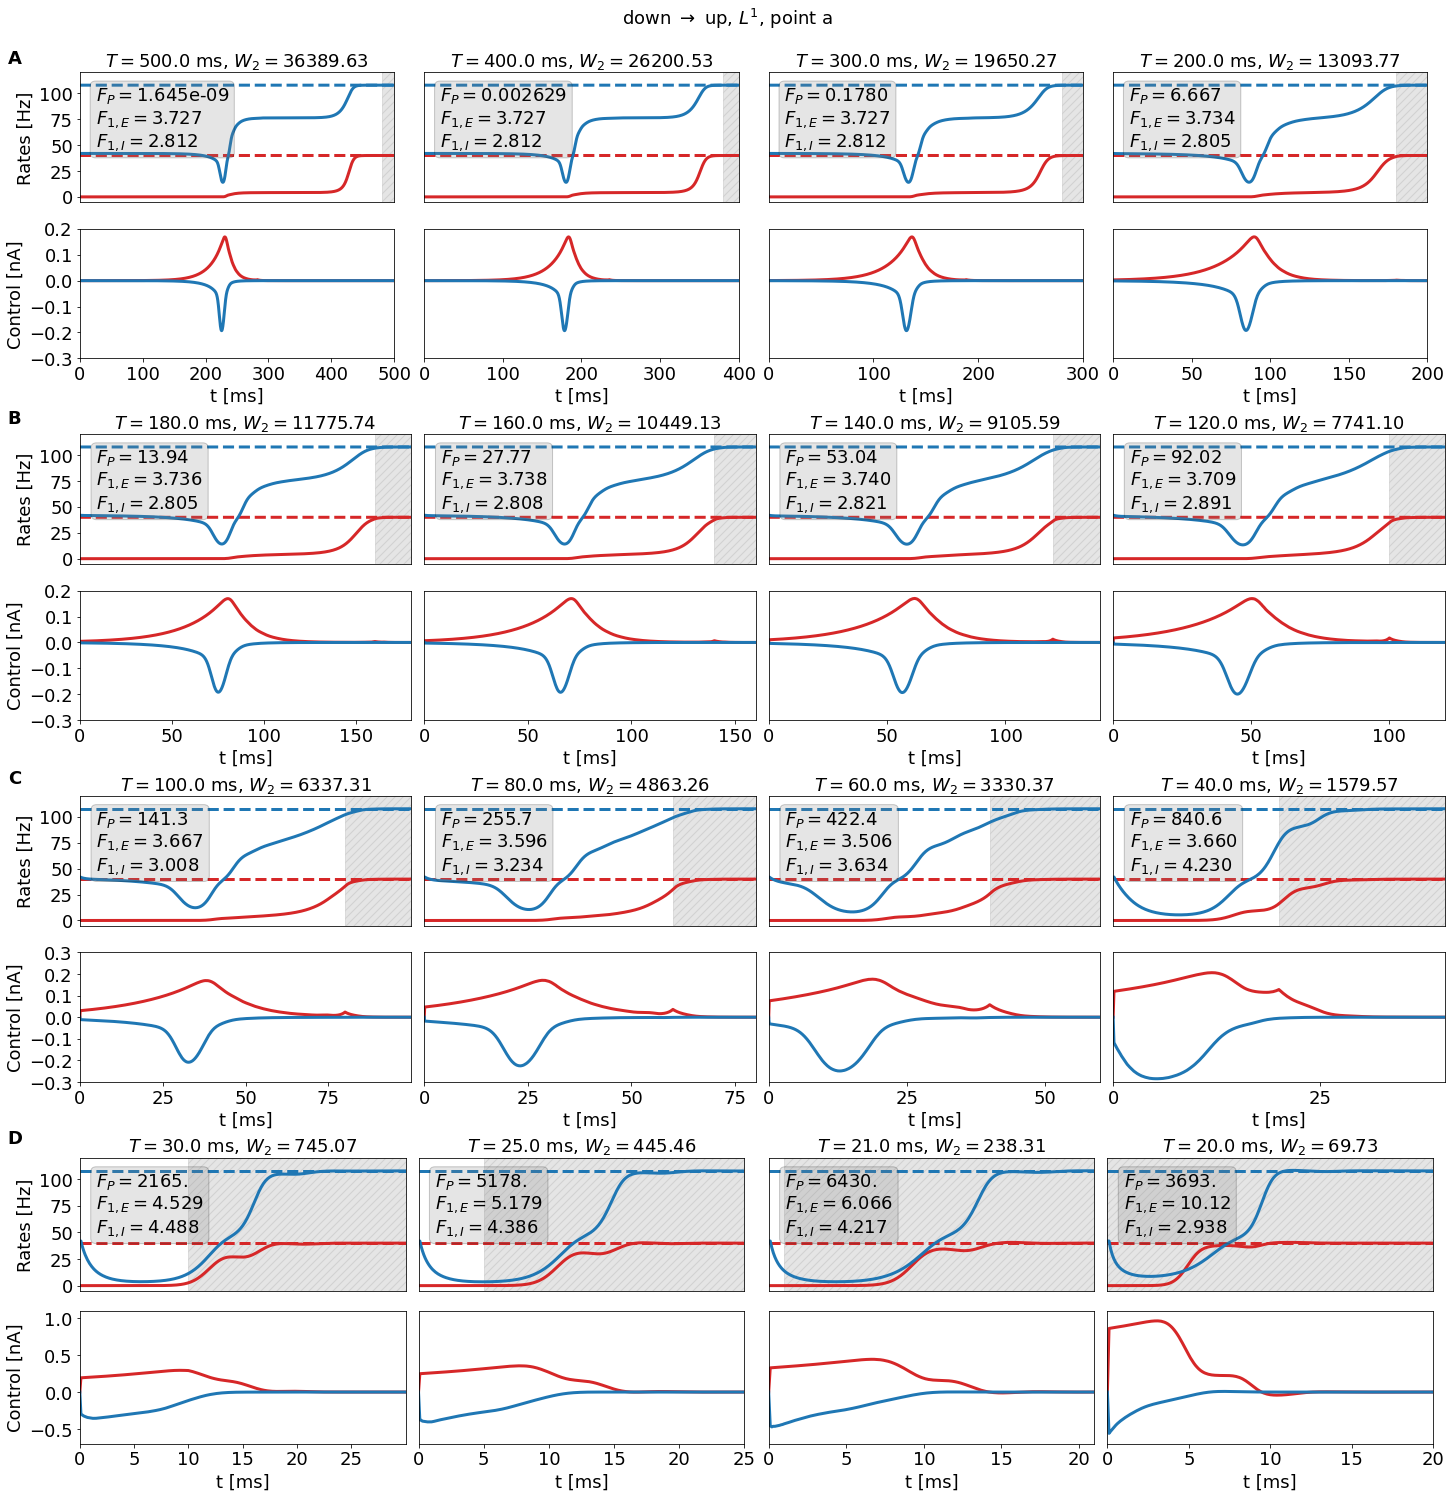

In [29]:
index_ = [ [0, 1000, 2000, 3000], 
          [3200, 3400, 3600, 3800],
          [4000, 4200, 4400, 4600],
          [4700, 4750, 4790, 4800] ]

y_lim = [ [[-0.3, 0.2], [-0.3, 0.2], [-0.3, 0.2], [-0.3, 0.2] ],
          [[-0.3, 0.2], [-0.3, 0.2], [-0.3, 0.2], [-0.3, 0.2] ],
          [[-0.3, 0.3], [-0.3, 0.3], [-0.3, 0.3], [-0.3, 0.3] ],
          [[-0.7, 1.1], [-0.7, 1.1], [-0.7, 1.1], [-0.7, 1.1] ]
        ]
y_ticks = [ [np.arange(-0.3,0.3,0.1), [], [], [] ],
            [np.arange(-0.3,0.3,0.1), [], [], [] ],
            [np.arange(-0.3,0.4,0.1), [], [], [] ],
            [np.arange(-0.5,1.5,0.5), [], [], [] ],
        ]
x_ticks = [ [np.arange(0., 501., 100.), np.arange(0., 501., 100.), np.arange(0., 501., 100.),
               np.arange(0., 300., 50.), np.arange(0., 200., 20.)],
            [np.arange(0., 300., 50.), np.arange(0., 300., 50.), np.arange(0., 300., 50.),
               np.arange(0., 300., 50.), np.arange(0., 300., 50.)],
            [np.arange(0., 100., 25.), np.arange(0., 100., 25.), np.arange(0., 100., 25.),
               np.arange(0., 100., 25.), np.arange(0., 100., 25.)],
            [np.arange(0., 30., 5.), np.arange(0., 30., 5.), np.arange(0., 30., 5.),
               np.arange(0., 30., 5.), np.arange(0., 30., 5.)]
          ]

cntrl_array = [ [opt_control[index_[0][0]], opt_control[index_[0][1]], opt_control[index_[0][2]],
                 opt_control[index_[0][3]] ],
                [opt_control[index_[1][0]], opt_control[index_[1][1]], opt_control[index_[1][2]],
                 opt_control[index_[1][3]] ],
                [opt_control[index_[2][0]], opt_control[index_[2][1]], opt_control[index_[2][2]],
                 opt_control[index_[2][3]] ],
                [opt_control[index_[3][0]], opt_control[index_[3][1]], opt_control[index_[3][2]],
                 opt_control[index_[3][3]] ]
                ]

state_array = [ [ opt_state[index_[0][0]], opt_state[index_[0][1]], opt_state[index_[0][2]],
                 opt_state[index_[0][3]] ],
                [ opt_state[index_[1][0]], opt_state[index_[1][1]], opt_state[index_[1][2]],
                 opt_state[index_[1][3]] ],
                [ opt_state[index_[2][0]], opt_state[index_[2][1]], opt_state[index_[2][2]],
                 opt_state[index_[2][3]] ],
               [ opt_state[index_[3][0]], opt_state[index_[3][1]], opt_state[index_[3][2]],
                 opt_state[index_[3][3]] ]
                ]

cost_array = [  [costnode_[index_[0][0]], costnode_[index_[0][1]], costnode_[index_[0][2]],
                 costnode_[index_[0][3]] ],
                [costnode_[index_[1][0]], costnode_[index_[1][1]], costnode_[index_[1][2]],
                 costnode_[index_[1][3]] ],
                [costnode_[index_[2][0]], costnode_[index_[2][1]], costnode_[index_[2][2]],
                 costnode_[index_[2][3]] ],
                [costnode_[index_[3][0]], costnode_[index_[3][1]], costnode_[index_[3][2]],
                 costnode_[index_[3][3]] ]
                ]

weight_array = [  [weights_[index_[0][0]][1], weights_[index_[0][1]][1], weights_[index_[0][2]][1],
                 weights_[index_[0][3]][1] ],
                [weights_[index_[1][0]][1], weights_[index_[1][1]][1], weights_[index_[1][2]][1],
                 weights_[index_[1][3]][1] ],
                [weights_[index_[2][0]][1], weights_[index_[2][1]][1], weights_[index_[2][2]][1],
                 weights_[index_[2][3]][1] ],
                [weights_[index_[3][0]][1], weights_[index_[3][1]][1], weights_[index_[3][2]][1],
                 weights_[index_[3][3]][1] ]
                ]


plot_control_current(aln, cntrl_array, state_array, weight_array, target_1b, cols[0], cost_array,
                     y_lim, y_ticks, x_ticks, filename_=folder + '_' + str(i) + '_Wmax.jpg')
plt.show()